# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
class_signs, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = len(class_signs)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

ClassId: 3
Sign name: Speed limit (60km/h)


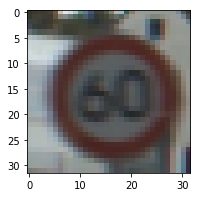

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

# load classid and signnames
signnames = pd.read_csv('signnames.csv')

# visualize one sample
index = random.randint(0, n_train)
image_example = X_train[index].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image_example)
print('ClassId: {}'.format(y_train[index]))
print('Sign name: {}'.format(signnames.iloc[y_train[index]][1]))

Class 0: Speed limit (20km/h)                               180 samples


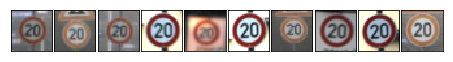


Class 1: Speed limit (30km/h)                               1980 samples


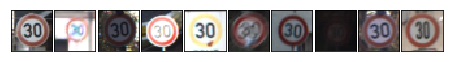


Class 2: Speed limit (50km/h)                               2010 samples


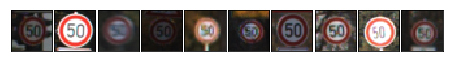


Class 3: Speed limit (60km/h)                               1260 samples


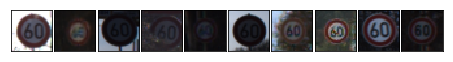


Class 4: Speed limit (70km/h)                               1770 samples


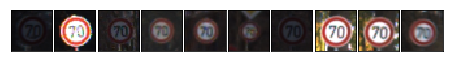


Class 5: Speed limit (80km/h)                               1650 samples


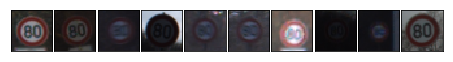


Class 6: End of speed limit (80km/h)                        360 samples


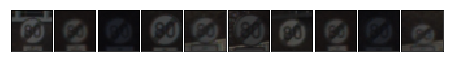


Class 7: Speed limit (100km/h)                              1290 samples


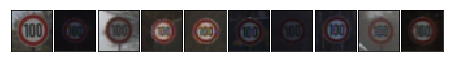


Class 8: Speed limit (120km/h)                              1260 samples


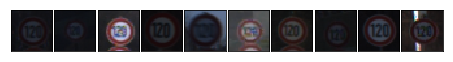


Class 9: No passing                                         1320 samples


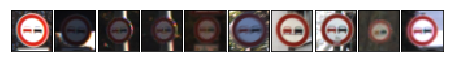


Class 10: No passing for vehicles over 3.5 metric tons       1800 samples


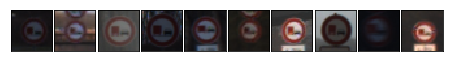


Class 11: Right-of-way at the next intersection              1170 samples


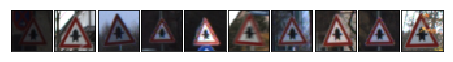


Class 12: Priority road                                      1890 samples


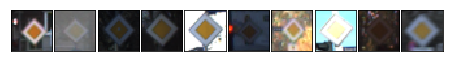


Class 13: Yield                                              1920 samples


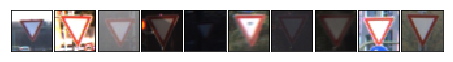


Class 14: Stop                                               690 samples


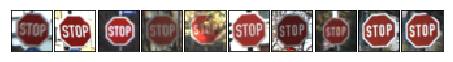


Class 15: No vehicles                                        540 samples


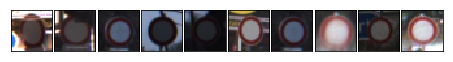


Class 16: Vehicles over 3.5 metric tons prohibited           360 samples


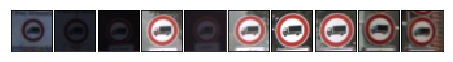


Class 17: No entry                                           990 samples


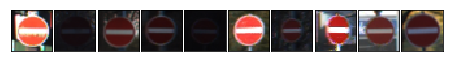


Class 18: General caution                                    1080 samples


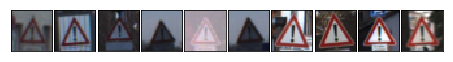


Class 19: Dangerous curve to the left                        180 samples


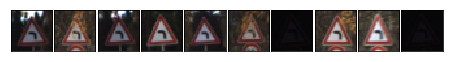


Class 20: Dangerous curve to the right                       300 samples



Class 21: Double curve                                       270 samples


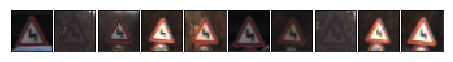


Class 22: Bumpy road                                         330 samples



Class 23: Slippery road                                      450 samples



Class 24: Road narrows on the right                          240 samples



Class 25: Road work                                          1350 samples


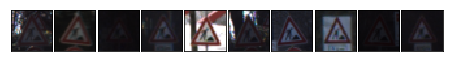


Class 26: Traffic signals                                    540 samples


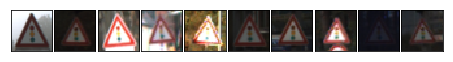


Class 27: Pedestrians                                        210 samples


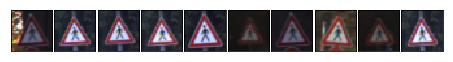


Class 28: Children crossing                                  480 samples


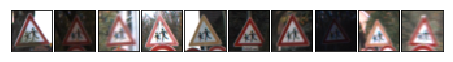


Class 29: Bicycles crossing                                  240 samples



Class 30: Beware of ice/snow                                 390 samples



Class 31: Wild animals crossing                              690 samples


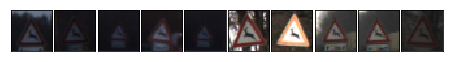


Class 32: End of all speed and passing limits                210 samples


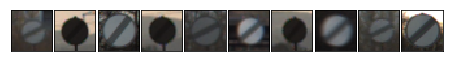


Class 33: Turn right ahead                                   599 samples



Class 34: Turn left ahead                                    360 samples



Class 35: Ahead only                                         1080 samples



Class 36: Go straight or right                               330 samples


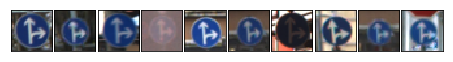


Class 37: Go straight or left                                180 samples


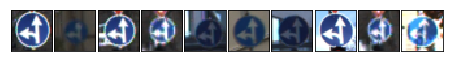


Class 38: Keep right                                         1860 samples


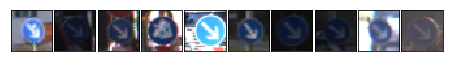


Class 39: Keep left                                          270 samples


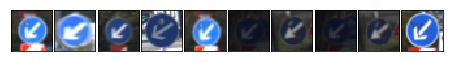


Class 40: Roundabout mandatory                               300 samples


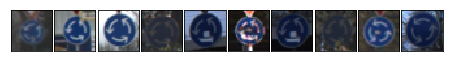


Class 41: End of no passing                                  210 samples


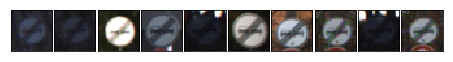


Class 42: End of no passing by vehicles over 3.5 metric tons 210 samples


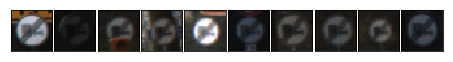

In [4]:
# Visualize all classes
max_string_len = max(len(name) for name in signnames['SignName'] )

for s, s_index, s_count in zip(class_signs, class_indices, class_counts):
    print("Class %i: %-*s %i samples" % (s, max_string_len, signnames.iloc[s][1], s_count))
    fig = plt.figure(figsize=(6, 1))
    fig.subplots_adjust(left =0, right=1, bottom=0, top=1, hspace=0.05, wspace = 0.05)
    sample_num = 10
    indices = random.sample(range(s_index, s_index+s_count), sample_num)
    for i in range(sample_num):
        axis = fig.add_subplot(1, sample_num, i+1, xticks=[], yticks=[])
        axis.imshow(X_train[indices[i]])
    plt.show()
    print("============================================================================\n")

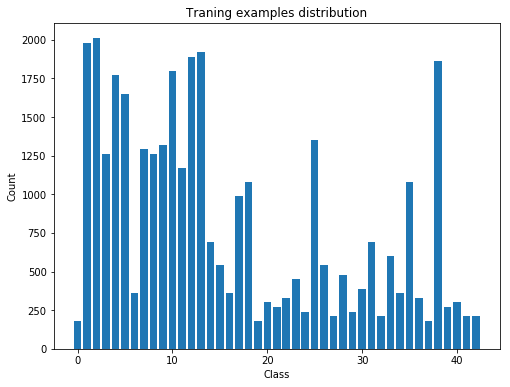

In [5]:
# Visualize classes distribution
plt.figure(figsize=(8, 6))
plt.bar(class_signs, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Traning examples distribution')
plt.show()

In [6]:
# lables
signnames

ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                               Stop
15       15                                        No vehicles
16       16           Vehicles over 3.5 metric tons prohibited
17       17                                           No entry
18       18                                    General caution
19       19                        Dangerous curve to the left
20       20                       Dangerous curve to the right
21       21                                       Double curve
22       22                                         Bumpy road
23       23                                      Slippery road
24       24                          Road narrows on the right
25       25                                          Road work
26       26                                    Traffic signals
27       27                                        Pedestrians
28       28                                  Children crossing
29       29                                  Bicycles crossing
30       30                                 Beware of ice/snow
31       31                              Wild animals crossing
32       32                End of all speed and passing limits
33       33                                   Turn right ahead
34       34                                    Turn left ahead
35       35                                         Ahead only
36       36                               Go straight or right
37       37                                Go straight or left
38       38                                         Keep right
39       39                                          Keep left
40       40                               Roundabout mandatory
41       41                                  End of no passing
42       42  End of no passing by vehicles over 3.5 metric ...

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from skimage import exposure
import warnings

def TurnGrayscale(data):
    # Grayscale
    data = 0.299*data[:,:,:,0] + 0.587*data[:,:,:,1] + 0.114*data[:,:,:,2]
    # Normalize
    data = (data/255.).astype(np.float32)
    # Add a single gray channel
    data = data.reshape(data.shape + (1,))
    return data
    
def GrayLocalEqualize(data):
    # Grayscale
    data = 0.299*data[:,:,:,0] + 0.587*data[:,:,:,1] + 0.114*data[:,:,:,2]
    # Normalize
    data = (data/255.).astype(np.float32)
    # Apply localized histogram localization  
    for i in range(data.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            # input to shoulde be squeezed in size
            data[i] = exposure.equalize_adapthist(data[i])
            print((i+1, data.shape[0]), end="\r")
    # Add a single gray channel
    data = data.reshape(data.shape + (1,))
    return data

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def NormalizeData(data):
    return (data-128)/128

import cv2
def grayscale(img):
    # function from LaneLine-P1
    # convert 3 channel to 1 channel
    img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def TurnGrayscale(data):
    data_gray = np.empty([data.shape[0], data.shape[1], data.shape[2]])
    for i in range(0, data.shape[0]):
        data_gray[i] = grayscale(data[i])
    #reshape from 3D to 4D
    data_output = data_gray.reshape((data.shape[0], data.shape[1], data.shape[2], 1))
    return data_output

def GrayLocalEqualize(data):
    # Grayscale
    data = 0.299*data[:,:,:,0] + 0.587*data[:,:,:,1] + 0.114*data[:,:,:,2]
    # Normalize
    data = (data/255.).astype(np.float32)
    # Apply localized histogram localization  
    for i in range(data.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            # input to shoulde be squeezed in size
            data[i] = exposure.equalize_adapthist(data[i])
            print((i+1, data.shape[0]), end="\r")
    # Add a single gray channel
    data = data.reshape(data.shape + (1,))
    return data

In [9]:
# convert to grayscale singel channel
X_train_gray = TurnGrayscale(X_train)
X_valid_gray = TurnGrayscale(X_valid)
X_test_gray = TurnGrayscale(X_test)

# localized histogram localization improve contrast
load_flag = True
if load_flag:
    with open('X_train_local.p', mode='rb') as f:
        X_train_local = pickle.load(f)
    
    with open('X_valid_local.p', mode='rb') as f:
        X_valid_local = pickle.load(f)
    
    with open('X_test_local.p', mode='rb') as f:
        X_test_local = pickle.load(f)

else:
    X_train_local = GrayLocalEqualize(X_train)
    X_valid_local = GrayLocalEqualize(X_valid)
    X_test_local = GrayLocalEqualize(X_test)
    
    pickle.dump(X_train_local, open('X_train_local.p', 'wb'))
    pickle.dump(X_valid_local, open('X_valid_local.p', 'wb'))
    pickle.dump(X_test_local, open('X_test_local.p', 'wb'))

Class 0: Speed limit (20km/h)                               180 samples


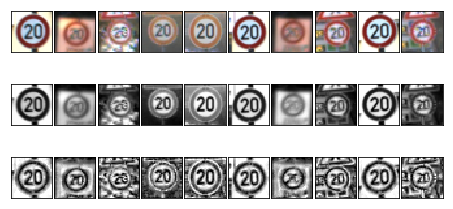


Class 1: Speed limit (30km/h)                               1980 samples



Class 2: Speed limit (50km/h)                               2010 samples


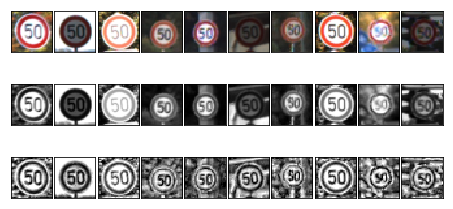


Class 3: Speed limit (60km/h)                               1260 samples



Class 4: Speed limit (70km/h)                               1770 samples



Class 5: Speed limit (80km/h)                               1650 samples



Class 6: End of speed limit (80km/h)                        360 samples



Class 7: Speed limit (100km/h)                              1290 samples



Class 8: Speed limit (120km/h)                              1260 samples



Class 9: No passing                                         1320 samples


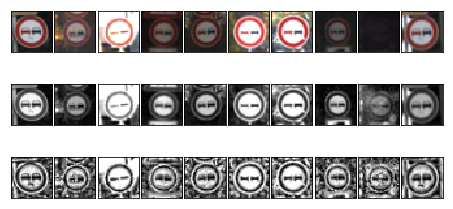


Class 10: No passing for vehicles over 3.5 metric tons       1800 samples



Class 11: Right-of-way at the next intersection              1170 samples


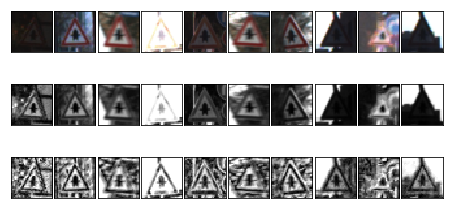


Class 12: Priority road                                      1890 samples


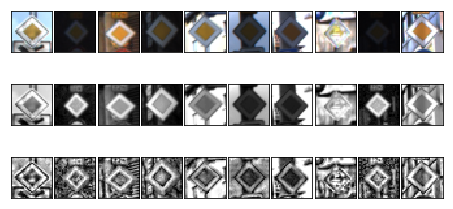


Class 13: Yield                                              1920 samples


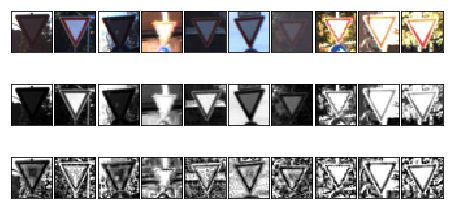


Class 14: Stop                                               690 samples


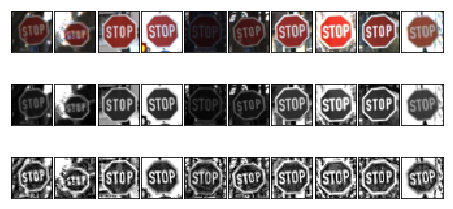


Class 15: No vehicles                                        540 samples



Class 16: Vehicles over 3.5 metric tons prohibited           360 samples


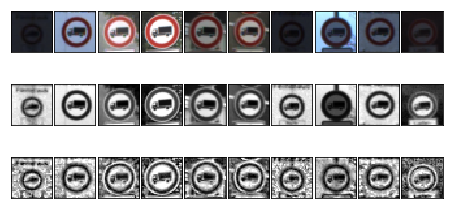


Class 17: No entry                                           990 samples


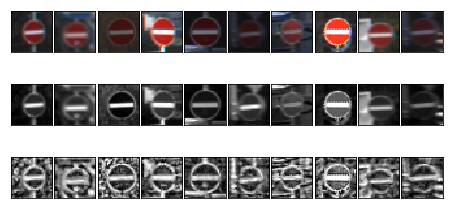


Class 18: General caution                                    1080 samples


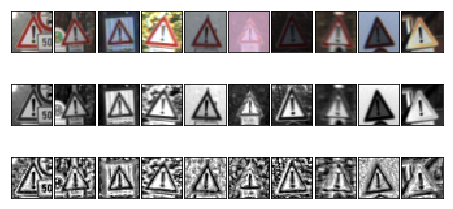


Class 19: Dangerous curve to the left                        180 samples


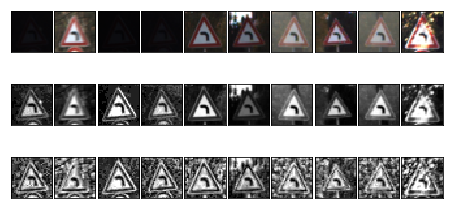


Class 20: Dangerous curve to the right                       300 samples


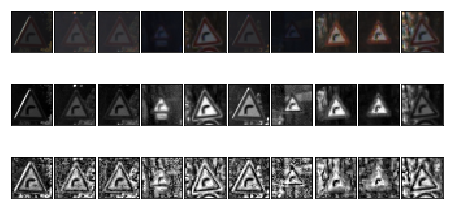


Class 21: Double curve                                       270 samples


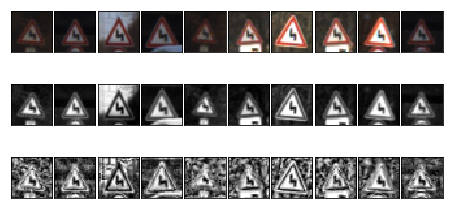


Class 22: Bumpy road                                         330 samples


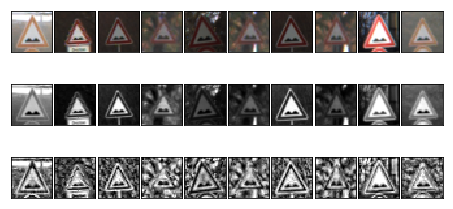


Class 23: Slippery road                                      450 samples


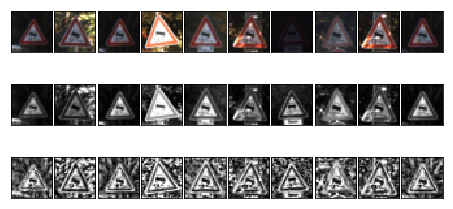


Class 24: Road narrows on the right                          240 samples


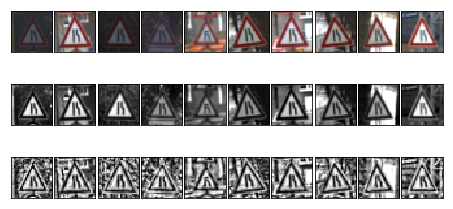


Class 25: Road work                                          1350 samples


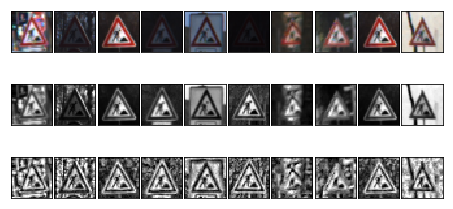


Class 26: Traffic signals                                    540 samples


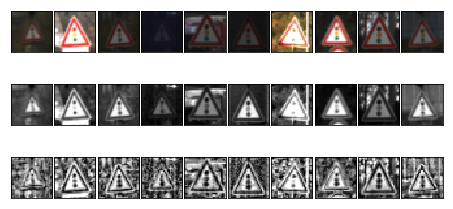


Class 27: Pedestrians                                        210 samples


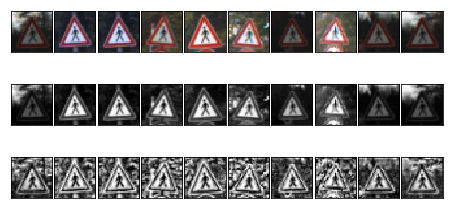


Class 28: Children crossing                                  480 samples


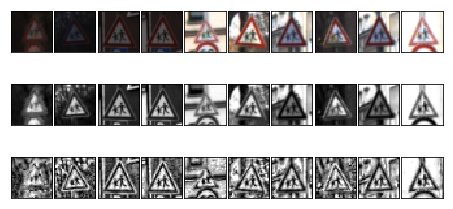


Class 29: Bicycles crossing                                  240 samples


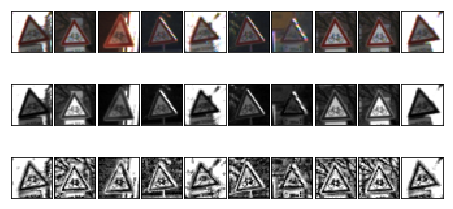


Class 30: Beware of ice/snow                                 390 samples


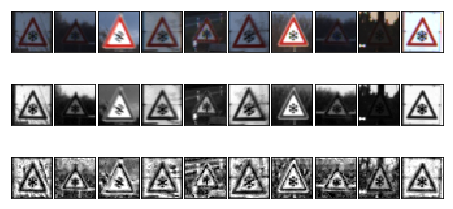


Class 31: Wild animals crossing                              690 samples


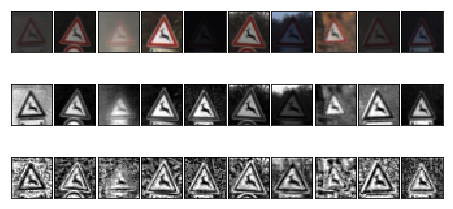


Class 32: End of all speed and passing limits                210 samples


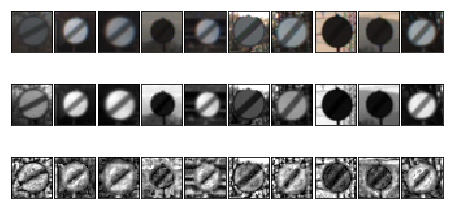


Class 33: Turn right ahead                                   599 samples



Class 34: Turn left ahead                                    360 samples


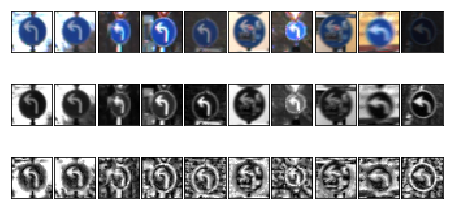


Class 35: Ahead only                                         1080 samples


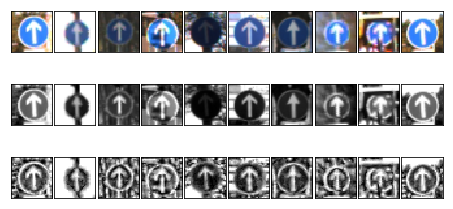


Class 36: Go straight or right                               330 samples


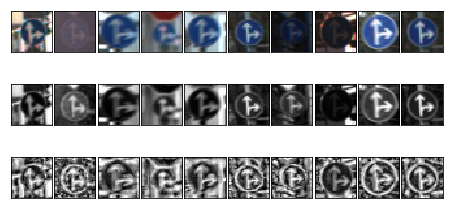


Class 37: Go straight or left                                180 samples


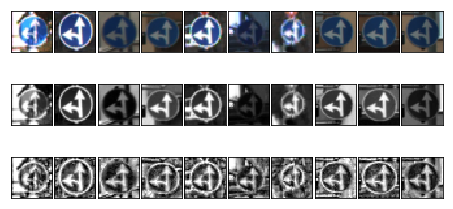


Class 38: Keep right                                         1860 samples


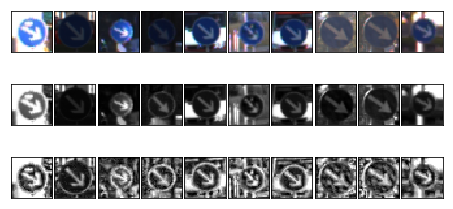


Class 39: Keep left                                          270 samples


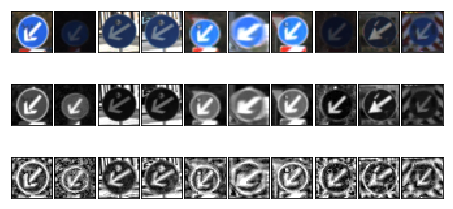


Class 40: Roundabout mandatory                               300 samples


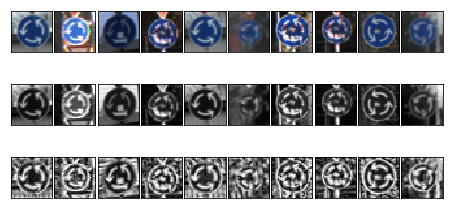


Class 41: End of no passing                                  210 samples


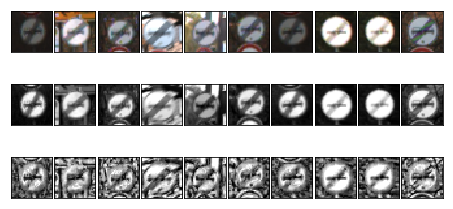


Class 42: End of no passing by vehicles over 3.5 metric tons 210 samples


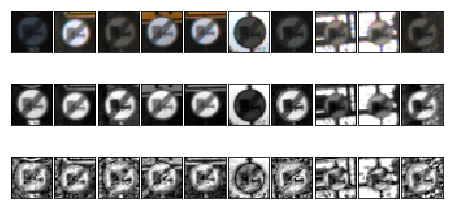

In [10]:
# Visualize all classes after preprocessing
max_string_len = max(len(name) for name in signnames['SignName'] )

for s, s_index, s_count in zip(class_signs, class_indices, class_counts):
    print("Class %i: %-*s %i samples" % (s, max_string_len, signnames.iloc[s][1], s_count))
    fig = plt.figure(figsize=(6, 3))
    fig.subplots_adjust(left =0, right=1, bottom=0, top=1, hspace=0.05, wspace = 0.05)
    sample_num = 10
    indices = random.sample(range(s_index, s_index+s_count), sample_num)
    for i in range(sample_num):
        # original
        axis = fig.add_subplot(3, sample_num, i+1, xticks=[], yticks=[])
        axis.imshow(X_train[indices[i]])
        
        # grayscale
        axis = fig.add_subplot(3, sample_num, i+1+sample_num, xticks=[], yticks=[])
        axis.imshow(X_train_gray[indices[i]].squeeze(), cmap ='gray')
        
        # grayscale localized 
        axis = fig.add_subplot(3, sample_num, i+1+sample_num*2, xticks=[], yticks=[])
        axis.imshow(X_train_local[indices[i]].squeeze(), cmap='gray')
        
    plt.show()
    print("============================================================================\n")

In [11]:
# Shuffle the training data
X_train_local_orin = X_train_local
from sklearn.utils import shuffle
seed = 2020
X_train_orin, y_train_orin = shuffle(X_train, y_train, random_state=seed)
X_train_gray, y_train_gray = shuffle(X_train_gray, y_train, random_state=seed)
X_train_local, y_train_local = shuffle(X_train_local, y_train, random_state=seed)

In [12]:
# Plot shuffled data to make sure sign names are still consistent with images
def PlotExampleShuffle(orinimg, grayimg, localimg, sign, index):
    print(signnames.iloc[sign[index]])
    fig = plt.figure(figsize=(6,3))
    
    a = fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
    a.imshow(orinimg[index].squeeze())
    
    a = fig.add_subplot(1, 3, 2, xticks=[], yticks=[])
    a.imshow(grayimg[index].squeeze(), cmap = 'gray') 
    
    a = fig.add_subplot(1, 3, 3, xticks=[], yticks=[])
    a.imshow(localimg[index].squeeze(), cmap='gray')

    ClassId                                      SignName
10       10  No passing for vehicles over 3.5 metric tons


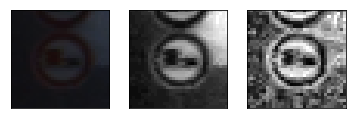

In [13]:
index_test = random.sample(range(n_train), 1)
PlotExampleShuffle(X_train_orin, X_train_gray, X_train_local, y_train_orin, index_test)

   ClassId               SignName
8        8  Speed limit (120km/h)


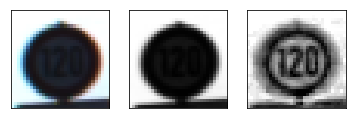

In [14]:
index_test = random.sample(range(n_train), 1)
PlotExampleShuffle(X_train_orin, X_train_gray, X_train_local, y_train_gray, index_test)

   ClassId              SignName
1        1  Speed limit (30km/h)


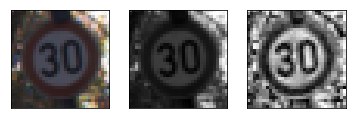

In [15]:
index_test = random.sample(range(n_train), 1)
PlotExampleShuffle(X_train_orin, X_train_gray, X_train_local, y_train_local, index_test)

### Model Architecture

In [16]:
### Define your architecture here.
# Setup Tensorflow
import tensorflow as tf

In [17]:
# LetNet architecture
from tensorflow.contrib.layers import flatten

#def LeNet(x, channel_num, keep_prob):
def LeNet(x):
    # Parameters for randomly defining weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    # Layer 1: Convolutional. Input = 32 x 32 x channel_num. Output = 28x28x6
    # (32 - filter + 1)/stride = 28
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1_strides = [1, 1, 1, 1]
    conv1_padding = 'VALID'
    conv1 = tf.nn.conv2d(x, conv1_W, strides=conv1_strides, padding=conv1_padding) + conv1_b
    
    # Activation
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'VALID')
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16
    # (14 - filter + 1)/stride = 10
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding= 'VALID') + conv2_b
    
    # Activation
    conv2 = tf.nn.relu(conv2)
    
    
    # Pooling. Input = 10x10x16. Output = 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation
    fc1 = tf.nn.relu(fc1)
    
    
    # Add Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation
    fc2 = tf.nn.relu(fc2)
    
    # Add Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels

In [18]:
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Training Pipeline
rate = 0.001
keep1 = 0.8
keep2 = 0.9

#logits = LeNet(x, 3)
logits = LeNet(x) # 1, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [20]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], 
                                  feed_dict={x: batch_x, y: batch_y, keep_prob1:keep1, keep_prob2:keep2}) #, keep_prob: keep})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    return total_loss/num_examples, total_accuracy/num_examples

2017-08-20 00:56:28
Learning rate:  0.001
EPOCHS:  100
BATCH_SIZE:  128
Training grayscale images

EPOCH 1...
Training Accuracy  = 0.513
Validation Accuracy = 0.469
Training Loss  = 1.521
Validation Loss = 1.659
Model saved

EPOCH 2...
Training Accuracy  = 0.757
Validation Accuracy = 0.717
Training Loss  = 0.763
Validation Loss = 0.892
Model saved

EPOCH 3...
Training Accuracy  = 0.841
Validation Accuracy = 0.798
Training Loss  = 0.492
Validation Loss = 0.619
Model saved

EPOCH 4...
Training Accuracy  = 0.893
Validation Accuracy = 0.843
Training Loss  = 0.338
Validation Loss = 0.514
Model saved

EPOCH 5...
Training Accuracy  = 0.910
Validation Accuracy = 0.849
Training Loss  = 0.279
Validation Loss = 0.457
Model saved

EPOCH 6...
Training Accuracy  = 0.930
Validation Accuracy = 0.875
Training Loss  = 0.221
Validation Loss = 0.410
Model saved

EPOCH 7...
Training Accuracy  = 0.939
Validation Accuracy = 0.880
Training Loss  = 0.193
Validation Loss = 0.390
Model saved

EPOCH 8...
Training

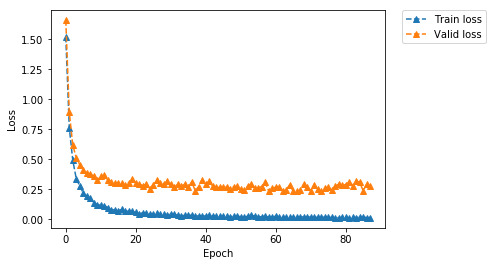

In [21]:
# Train Model: normalized color images
EPOCHS = 100
BATCH_SIZE = 128
from datetime import datetime
starttime = datetime.now()
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

train_cur_accuracy = []
train_cur_loss = []
valid_cur_accuracy = 0
valid_cur_loss = 100
test_cur_accuracy = []
test_cur_loss = []

epoch_best = 0
early_stop = 20

train_accuracy_history = []
valid_accuracy_history = []
train_loss_history = []
valid_loss_history = []

print('Learning rate: ', rate)
print('EPOCHS: ', EPOCHS)
print('BATCH_SIZE: ', BATCH_SIZE)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_local)
    
    #print("Training color images ...")
    print("Training grayscale images")
    #print("Training normalized color images")
    print()
    for i in range(EPOCHS):
        #X_train_epoch, y_train_epoch = shuffle(X_train, y_train)
        X_train_epoch, y_train_epoch = shuffle(X_train_local, y_train_local)
        #X_train_epoch, y_train_epoch = shuffle(X_train_norm, y_train_norm)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_epoch[offset:end], y_train_epoch[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1:keep1, keep_prob2:keep2}) #, keep_prob: keep})
        
        train_loss, train_accuracy = evaluate(X_train_local, y_train_local)
        valid_loss, valid_accuracy = evaluate(X_valid_local, y_valid)
        test_loss,  test_accuracy = evaluate(X_test_local, y_test)

        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)
        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)
        
        
        if valid_cur_loss > valid_loss:
            train_cur_accuracy = train_accuracy
            valid_cur_accuracy = valid_accuracy
            train_cur_loss = train_loss
            valid_cur_loss = valid_loss
                   
            test_cur_accuracy = test_accuracy
            test_cur_loss = test_loss
            
            epoch_best = i+1
            
            print("EPOCH {}...".format(i+1))
            print("Training Accuracy  = {:.3f}".format(train_accuracy))
            print("Validation Accuracy = {:.3f}".format(valid_accuracy))
            
            print("Training Loss  = {:.3f}".format(train_loss))
            print("Validation Loss = {:.3f}".format(valid_loss))
            
            saver.save(sess, './lenetTest')
            print("Model saved")
            print()

        if (i+1 - epoch_best) > early_stop:
            break

endtime = datetime.now()
duration = endtime - starttime
print("Duration: ", duration)
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

print()
print('Learning rate: ', rate)
print('Epoch: ', epoch_best)
print('Training accuracy: ', train_cur_accuracy)
print('Validation accuracy: ',valid_cur_accuracy)
print('Test accuracy: ',test_cur_accuracy)
# plot training and validation loss across epochs
plt.figure(figsize=(6, 4))
plt.plot(train_loss_history, '^--', label='Train loss')
plt.plot(valid_loss_history, '^--', label='Valid loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# plot training and validation accuracy across epochs
plt.figure(figsize=(6, 4))
plt.plot(train_accuracy_history, '^-.', label='Train accuracy')
plt.plot(valid_accuracy_history, '^-.', label='Valid accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [22]:
### Load the images and plot them here
### Preprocess test images as training images
import cv2
# true labels
y = np.array([17, 25, 14, 13, 1])
def PreprocessTestData():
    fig = plt.figure(figsize=(10,1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    sample_num = 5
    test = np.empty([sample_num, 32, 32, 3])
    
    # load jpeg images
    for i in range(sample_num):
        filename = 'new_test/test' + str(i+1) + '.jpeg'
        bgr = cv2.imread(filename)
        rgb = bgr[...,::-1]
        # resize 32x32
        resized_image_bgr = cv2.resize(bgr, (32, 32), interpolation = cv2.INTER_CUBIC) 
        resized_image_rgb = resized_image_bgr[...,::-1]
        test[i] = resized_image_rgb
        # plot image
        ax = fig.add_subplot(1, sample_num, i+1, xticks=[], yticks=[])
        ax.title.set_text((y[i], signnames.iloc[y[i]][1]))
        ax.imshow(resized_image_rgb.squeeze(), cmap='gray')
    
    # grayscale and local equalize
    data_local = GrayLocalEqualize(test)


    pickle.dump((data_local,y), open('test5images.p', 'wb'))


PreprocessTestData()

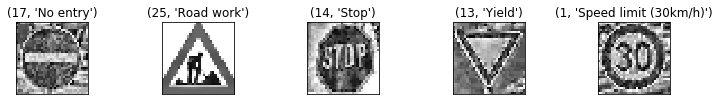

In [23]:
### Load preprocessed images
with open('test5images.p', mode='rb') as f:
    X_test5, y_test5 = pickle.load(f)

fig = plt.figure(figsize=(10, 1))
fig.subplots_adjust(left =0, right=1, bottom=0, top=1, hspace=0.05, wspace = 0.05)
sample_num = X_test5.shape[0]
for i in range(sample_num):
    axis = fig.add_subplot(1, sample_num, i+1, xticks=[], yticks=[])
    axis.imshow(X_test5[i].squeeze(), cmap='gray')
    axis.title.set_text((y[i], signnames.iloc[y[i]][1]))
plt.show()

### Predict the Sign Type for Each Image

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
with tf.Session() as sess:
    # Load model
    loader = tf.train.import_meta_graph('./lenetTest.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    predicted_logits = sess.run(logits, feed_dict={x:X_test5, keep_prob1:1, keep_prob2:1})
    predicted_labels = np.argmax(predicted_logits, axis=1)
    
    print('     True Signs:', y)
    print('Predicted Signs:', predicted_labels)

     True Signs: [17 25 14 13  1]
Predicted Signs: [17 25 14 13  1]


### Analyze Performance

In [25]:
### Calculate the accuracy for these 5 new images.
predicted_accuracy = sum(predicted_labels == y)/len(y)
print('Predicted accuracy: ', predicted_accuracy)

Predicted accuracy:  1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [26]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
import math
with tf.Session() as sess:
    # Load model
    loader = tf.train.import_meta_graph('./lenetTest.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    predicted_logits = sess.run(logits, feed_dict={x:X_test5, keep_prob1:1,keep_prob2:1})
    predicted_probs = sess.run(tf.nn.softmax(predicted_logits))
    top5_softmaxprob = sess.run(tf.nn.top_k(tf.constant(predicted_probs), k=5))
    
    print('Predicted top five softmax probabilities for five new test images:\n')
    print(np.round(top5_softmaxprob[0], 2))
    print('Predicted top five signs for five new test images:\n')
    print(top5_softmaxprob[1])

Predicted top five softmax probabilities for five new test images:

[[ 1.          0.          0.          0.          0.        ]
 [ 0.99000001  0.          0.          0.          0.        ]
 [ 0.94999999  0.05        0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.        ]]
Predicted top five signs for five new test images:

[[17  9 34 40 37]
 [25 24 27 11 23]
 [14 15  3 13 33]
 [13 35 15  2  3]
 [ 1  6  5 38  0]]


Top five predicted signs for  1  test image:


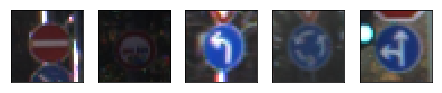

=================================================================---

Top five predicted signs for  2  test image:


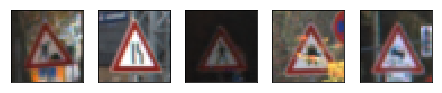

=================================================================---

Top five predicted signs for  3  test image:


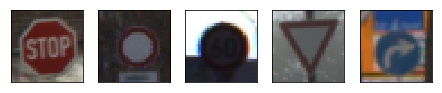

=================================================================---

Top five predicted signs for  4  test image:


=================================================================---

Top five predicted signs for  5  test image:


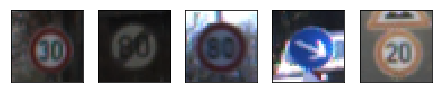

=================================================================---



In [29]:
for i in range(5):
    print('Top five predicted signs for ', i+1, ' test image:')
    labels = top5_softmaxprob[1][i]
    fig=plt.figure(figsize=(6, 1))
    fig.subplots_adjust(left =0, right=1, bottom=0, top=1, hspace=0.05, wspace = 0.05)
    k= 5
    for j in range(k):
        label = labels[j]
        index = class_indices[label]+100
        axis = fig.add_subplot(1, k, j+1, xticks=[], yticks=[])
        axis.imshow(X_train[index].squeeze(), cmap='gray')
    plt.show()
    print("=================================================================---\n")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [28]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")